In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR

In [2]:
data_dir = "data/"

# Data Cleaning

## Reading in the Data

In [3]:
austin_df = pd.read_csv(os.path.join(data_dir, "Austin_Housing.csv"), index_col=None)
austin_df.head()

,zpid,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,...,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,homeImage
0,111373431,pflugerville,14424 Lake Victor Dr,78660,"14424 Lake Victor Dr, Pflugerville, TX 78660 i...",30.430632,-97.663078,1.98,2,True,...,1,1,1.266667,2.666667,1063,14,3.0,4,2,111373431_ffce26843283d3365c11d81b8e6bdc6f-p_f...
1,120900430,pflugerville,1104 Strickling Dr,78660,Absolutely GORGEOUS 4 Bedroom home with 2 full...,30.432673,-97.661697,1.98,2,True,...,1,1,1.400000,2.666667,1063,14,2.0,4,1,120900430_8255c127be8dcf0a1a18b7563d987088-p_f...
2,2084491383,pflugerville,1408 Fort Dessau Rd,78660,Under construction - estimated completion in A...,30.409748,-97.639771,1.98,0,True,...,1,1,1.200000,3.000000,1108,14,2.0,3,1,2084491383_a2ad649e1a7a098111dcea084a11c855-p_...
3,120901374,pflugerville,1025 Strickling Dr,78660,Absolutely darling one story home in charming ...,30.432112,-97.661659,1.98,2,True,...,1,1,1.400000,2.666667,1063,14,2.0,3,1,120901374_b469367a619da85b1f5ceb69b675d88e-p_f...
4,60134862,pflugerville,15005 Donna Jane Loop,78660,Brimming with appeal & warm livability! Sleek ...,30.437368,-97.656860,1.98,0,True,...,1,1,1.133333,4.000000,1223,14,3.0,3,2,60134862_b1a48a3df3f111e005bb913873e98ce2-p_f.jpg


In [4]:
austin_df.dtypes

,0
zpid,int64
city,object
streetAddress,object
zipcode,int64
description,object
latitude,float64
longitude,float64
propertyTaxRate,float64
garageSpaces,int64
hasAssociation,bool


## Cleaning and Preparing the dataset for modelling

In [5]:
df = austin_df.copy()
df.shape

(15171, 47)

### Converting the Boolean to Numerics

In [6]:
for column in df.select_dtypes(include="boolean").columns:
    df[column].replace({
        True: 1,
        False: 0
    }, inplace=True)

<ipython-input-6-9ba18366daab>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].replace({
<ipython-input-6-9ba18366daab>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[column].replace({


### Selecting Numeric Columns

In [7]:
df.select_dtypes(include="number").columns

Index(['zpid', 'zipcode', 'latitude', 'longitude', 'propertyTaxRate',
       'garageSpaces', 'hasAssociation', 'hasCooling', 'hasGarage',
       'hasHeating', 'hasSpa', 'hasView', 'parkingSpaces', 'yearBuilt',
       'latestPrice', 'numPriceChanges', 'latest_salemonth', 'latest_saleyear',
       'numOfPhotos', 'numOfAccessibilityFeatures', 'numOfAppliances',
       'numOfParkingFeatures', 'numOfPatioAndPorchFeatures',
       'numOfSecurityFeatures', 'numOfWaterfrontFeatures',
       'numOfWindowFeatures', 'numOfCommunityFeatures', 'lotSizeSqFt',
       'livingAreaSqFt', 'numOfPrimarySchools', 'numOfElementarySchools',
       'numOfMiddleSchools', 'numOfHighSchools', 'avgSchoolDistance',
       'avgSchoolRating', 'avgSchoolSize', 'MedianStudentsPerTeacher',
       'numOfBathrooms', 'numOfBedrooms', 'numOfStories'],
      dtype='object')

In [8]:
columns_to_keep = [
    "latitude",
    "longitude",
    "propertyTaxRate",
    "garageSpaces",
    "hasAssociation",
    "hasCooling",
    "hasGarage",
    "hasHeating",
    "hasSpa",
    "hasView",
    "parkingSpaces",
    "yearBuilt",
    "numOfAccessibilityFeatures",
    "numOfAppliances",
    "numOfParkingFeatures",
    "numOfPatioAndPorchFeatures",
    "numOfSecurityFeatures",
    "numOfWaterfrontFeatures",
    "numOfWindowFeatures",
    "numOfCommunityFeatures",
    "lotSizeSqFt",
    "livingAreaSqFt",
    "numOfPrimarySchools",
    "numOfElementarySchools",
    "numOfMiddleSchools",
    "numOfHighSchools",
    "avgSchoolDistance",
    "avgSchoolRating",
    "avgSchoolSize",
    "MedianStudentsPerTeacher",
    "numOfBathrooms",
    "numOfBedrooms",
    "numOfStories",
]

X = df[columns_to_keep]
X.loc[0]

,0
latitude,30.430632
longitude,-97.663078
propertyTaxRate,1.980000
garageSpaces,2.000000
hasAssociation,1.000000
hasCooling,1.000000
hasGarage,1.000000
hasHeating,1.000000
hasSpa,0.000000
hasView,0.000000


## Normalize the Data

In [9]:
X = StandardScaler().fit_transform(df[columns_to_keep])
X.shape

(15171, 33)

In [10]:
X[0]

array([ 1.4338025 ,  1.36289212, -0.26524841,  0.57009709,  0.94589488,
        0.13562067,  0.90429918,  0.0995931 , -0.2929411 , -0.54304316,
        0.5732979 ,  1.08649766, -0.07236902,  0.80562407,  0.36760061,
        0.342191  ,  3.07248376, -0.04481918,  1.62090109, -0.09117329,
       -0.0092287 ,  0.28485161,  0.25083127, -0.20930844, -0.13651904,
        0.07945047, -0.53524888, -1.673595  , -0.5338539 , -0.49215066,
        0.30063214,  0.65844366,  1.01727629])

In [11]:
y = df["latestPrice"]
y

,latestPrice
0,305000.0
1,295000.0
2,256125.0
3,240000.0
4,239900.0
...,...
15166,330000.0
15167,550000.0
15168,875000.0
15169,420000.0


## Train Test Split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}, y_train: {y_train.shape}, y_test: {y_test.shape}")

X_train: (12136, 33), X_test: (3035, 33), y_train: (12136,), y_test: (3035,)


# Linear Regression

In [13]:
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

LinearRegression()

### R<sup>2</sup> Value

In [14]:
linear_regression.score(X_test, y_test)

0.3917021886011465

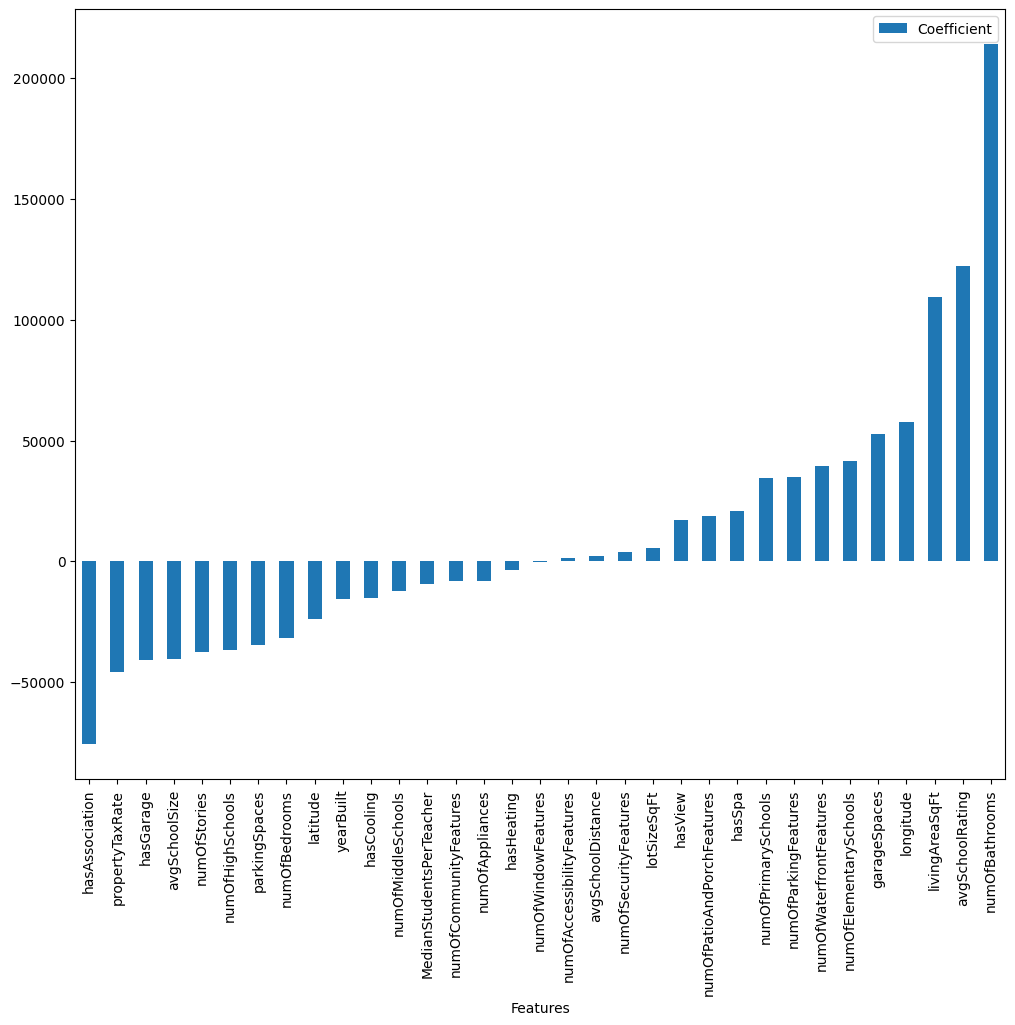

In [59]:
pd.DataFrame(data=zip(columns_to_keep,linear_regression.coef_), columns=["Features", "Coefficient"]).set_index("Features").sort_values(by="Coefficient").plot(kind="bar", figsize=(12, 10));

# Logistic Regression

In [16]:
logistic_regression = LogisticRegression(random_state=42)
logistic_regression.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

### R<sup>2</sup> Value

In [17]:
logistic_regression.score(X_test, y_test)

0.01943986820428336

# Support Vector Regression

In [18]:
support_vector_regression = SVR()
support_vector_regression.fit(X_train, y_train)

SVR()

### R<sup>2</sup> Value

In [19]:
support_vector_regression.score(X_test, y_test)

-0.04848504836323664